Import libraries

In [58]:
import os
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.models as models
import cv2 as cv

Example_1: one image

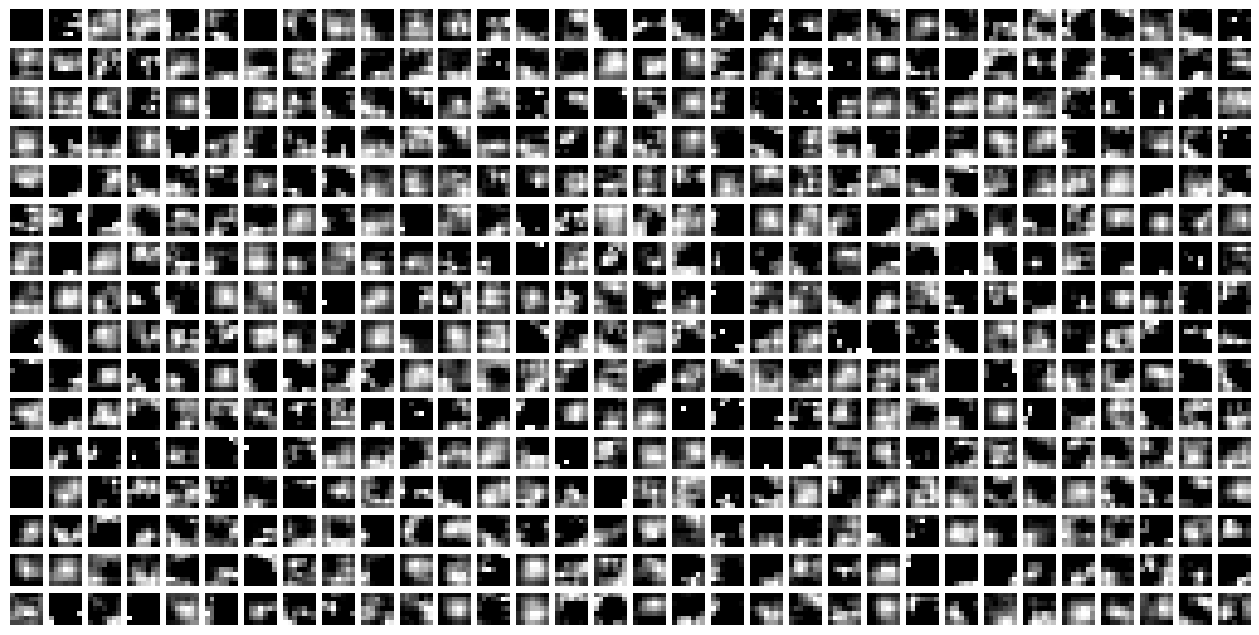

In [59]:
image_path= "C:/Users/hadil/Downloads/folder/cat.png"

pretrained_model = models.resnet18(pretrained=True)

def extract_dlfeature(pretrained_model, layer_name, image_arr):
    def extract_features(image_path, model):
            # Load the image and apply the necessary transformations
        image = Image.open(image_path).convert('RGB')
        transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ])
        image = transform(image)
        image = image.unsqueeze(0)  # Add batch dimension

        model = nn.Sequential(*layer_name)
        model.eval()
        with torch.no_grad():
                features = model(image)

            
        return features.squeeze()
        
        
    layer = list(pretrained_model.children())[:-1]
    feature_arr = list()
    for im in image_arr:
        features = extract_features(layer, im)
        feature_arr.append(features)

    return feature_arr

# Create a 16x32 grid of subplots (to fit all 512 features)
fig, axs = plt.subplots(nrows=16, ncols=32, figsize=(16, 8))

# Loop over the features and plot each one as an image in a subplot
for i in range(512):
    row = i // 32
    col = i % 32
    axs[row, col].imshow(features[i], cmap='gray')
    axs[row, col].axis('off')

# Show the plot
plt.show()

Example_2: two images

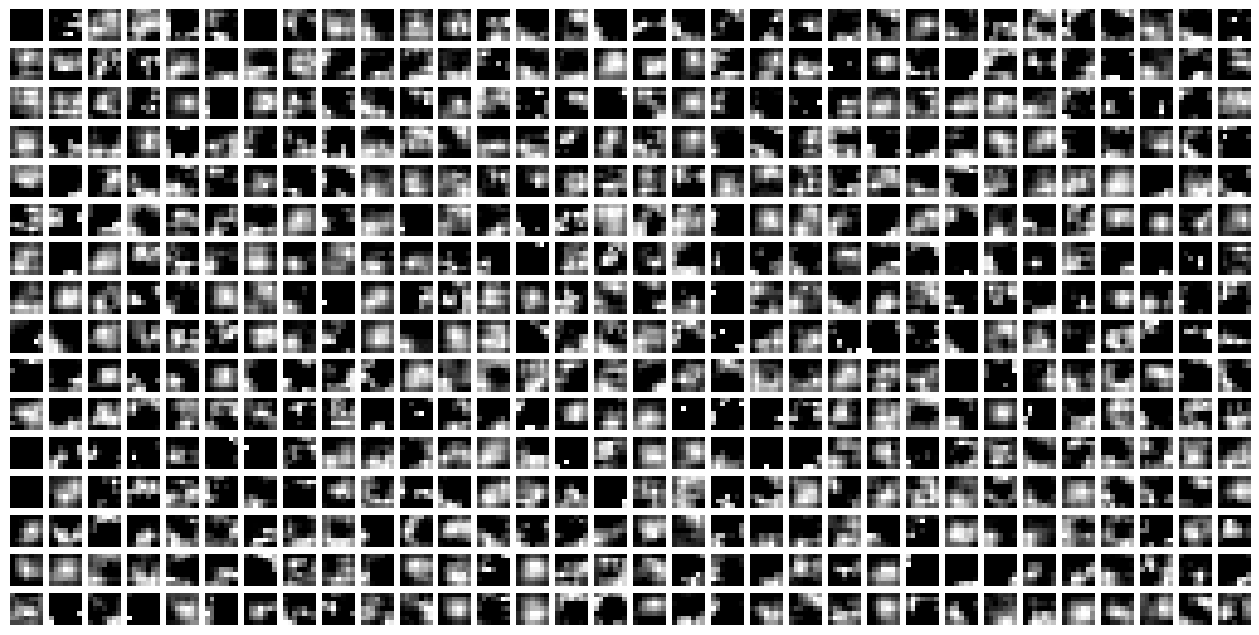

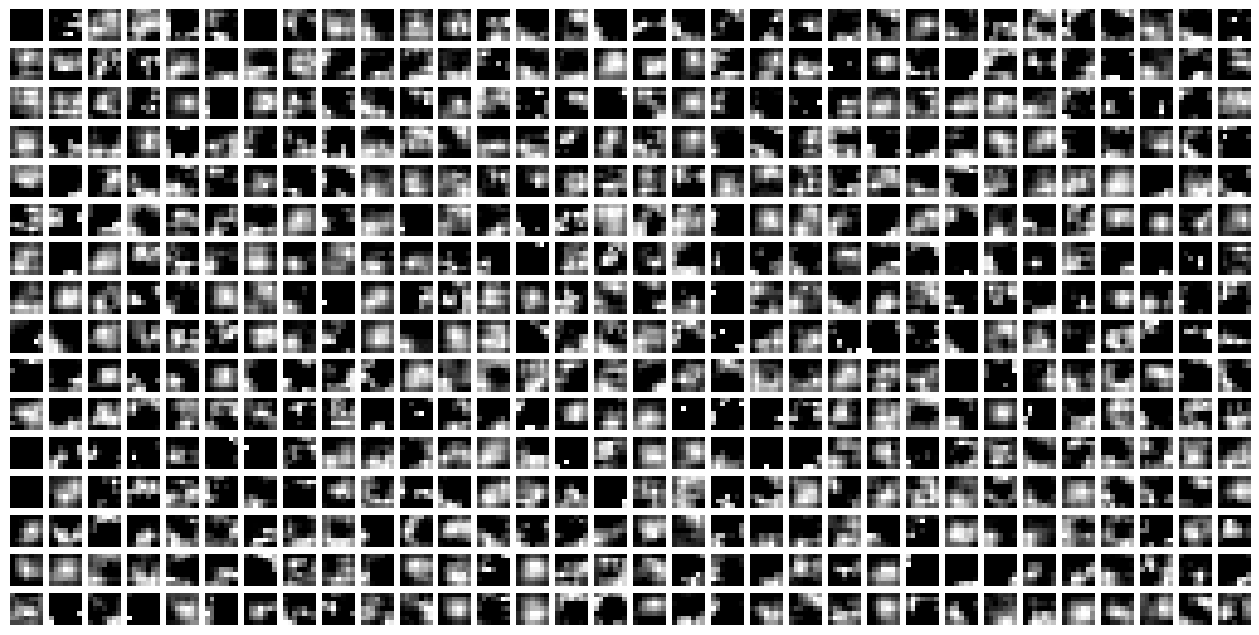

In [60]:
import os
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import csv
import matplotlib.pyplot as plt
import torchvision.models as models
import cv2 as cv

image_path= "C:/Users/hadil/Downloads/folder/"
images = os.listdir(image_path)
pretrained_model = models.resnet18(pretrained=True)

image_arr=[]
for i in images:
    i = os.path.join(image_path, i)
    image = cv.imread(i)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_arr.append(image)

    def extract_dlfeature(pretrained_model, layer_name, image_arr):
        def extract_features(image_path, model):
            # Load the image and apply the necessary transformations
            #image = Image.open(image_path).convert('RGB')
            transform = transforms.Compose([
                transforms.Resize(256),                                                                     #transformation necessary for Resnet18
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ])
            image = transform(image)
            image = image.unsqueeze(0)  # Add batch dimension

            model = nn.Sequential(*layer_name)
            model.eval()
            with torch.no_grad():
                features = model(image)

            
            return features.squeeze()
        
        
        layer = list(pretrained_model.children())[:-1]
        feature_arr = list()
        for im in image_arr:
            features = extract_features(layer, im)
            feature_arr.append(features)

        return feature_arr
    # Create a 16x32 grid of subplots (to fit all 512 features)
    fig, axs = plt.subplots(nrows=16, ncols=32, figsize=(16, 8))

    # Loop over the features and plot each one as an image in a subplot
    for i in range(512):
        row = i // 32
        col = i % 32
        axs[row, col].imshow(features[i], cmap='gray')
        axs[row, col].axis('off')

    # Show the plot
    plt.show()